# Case 1 - Heart disease prediction

### 1. Used data set
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
    
### 2. Data set columns and corresponding attributes
 
<b>Column numbers & corresponding attributes</b><br>

0 = age<br>
1 = sex<br>
2 = cp<br>
3 = trestbps<br>
4 = chol<br>
5 = fbs<br>
6 = restecg<br>
7 = thalach<br>
8 = exang<br>
9 = oldpeak<br>
10 = slope<br>
11 = ca<br>
12 = thal<br>
13 = num (the predicted attribute)
      
### 3. Data set preprocessing
      
Using the samples with NaN-values, NaN casted to 0.

### 4. -


In [10]:
### Importing necessary dependencies

%pylab inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection

Populating the interactive namespace from numpy and matplotlib


In [2]:
###  Reading the data file
##   removing index column and headers and specifying missing value notation
#    filling n/a values with 0 and printing the tail (5 values) of the data

filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(filename, index_col = None, header = None, na_values = '?')
df = df.dropna()
df.fillna(0)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
### Splitting the data, columns 0-12 and labels, column 13 (cast all values to 1 where value is more than 0)
##  printing the shape of data and labels afterwards 

data = df.loc[:, 0:12]
labels = 1.0*(df.loc[:, 13] > 0)
print(data.shape)
print(labels.shape)
## labels_healthy = (df.loc[:, 13] == 0)
## labels_diseased = (df.loc[:, 13] > 0)
## print(labels_healthy)
## print(labels_diseased)

(297, 13)
(297,)


In [4]:
### Scaling the data to only have values between 0 and 1
##  optimizes the data for a neural network application
#   df.describe to validate the scaling is done

minmax_scaler = preprocessing.MinMaxScaler()
scaled_data = minmax_scaler.fit_transform(data)
df = pd.DataFrame(scaled_data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.532127,0.676768,0.719416,0.355600,0.277055,0.144781,0.498316,0.599995,0.326599,0.170251,0.301347,0.225589,0.432660
std,0.188536,0.468500,0.321620,0.167574,0.118716,0.352474,0.497457,0.175126,0.469761,0.188084,0.309093,0.312988,0.484657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.267123,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.342466,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
### Splitting the data and labels to the training set and test set (80% training set, 20% test set)
##  shuffle=True => shuffle from where to take the training and test samples

train_data,test_data,train_labels,test_labels = model_selection.train_test_split(df,labels,test_size=0.20,shuffle=True)

# Casting the labels as numpy arrays to avoid Tensorflow Warnings
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [6]:
### Creating the neural network model
##  choosing the activation & loss methods, optimizer and metrics
#   dropout 20-50% to prevent overfitting

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
### Fitting the model
##  usual syntax of fitting:
#   model.fit(train_data, train_labels, validation_split=0-1, batch_size=X, epochs=X)

# Splitting the data and labels to the training and validation set (75% training, 25% validation)

print ("Training prototype model....")
prototype=model.fit(train_data, train_labels, validation_split=0.25, epochs=500, batch_size=6,verbose=0)
print ("Training complete.")

# Printing plottable values
print(prototype.history.keys())

Training prototype model....
Training complete.
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


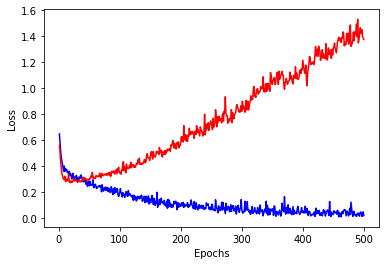

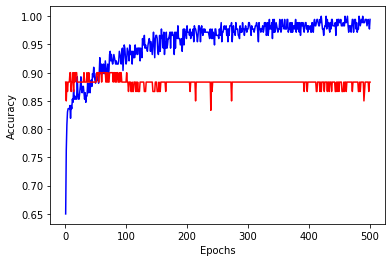

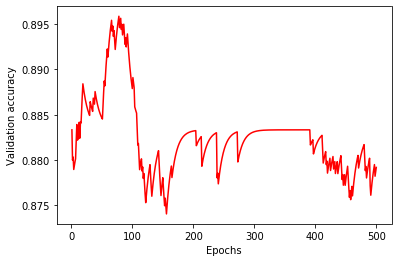

In [8]:
### Plotting Epochs in correlation to loss and accuracy

loss = prototype.history['loss']
val_loss = prototype.history['val_loss']
accuracy = prototype.history['accuracy']
val_accuracy = prototype.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Smooth the validation accuracy curve to find the optimal amount of Epochs

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[0:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.show()

In [ ]:
### Build a fresh neural network model based on the graphical data to avoid over/undertraining

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
### Train the new final model for a suitable amount to obtain best results
##  check optimal epoch amount from above to avoid overfitting etc.
#   now do use the whole training data, including the samples previously used for validation only)

print ("Training final model....")
final = model.fit(train_data, train_labels, epochs=50, batch_size=6, verbose=0)
print ("Training complete.")

In [ ]:
### Evaluate final models against the unseen test data and labels
##  if the 
print("Evaluate model against unsen data")
score = model.evaluate(test_data, test_labels, verbose=0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))